In [138]:
import pandas as pd
import networkx as nx

In [139]:
import matplotlib.pyplot as plt

In [140]:
from typing import Union, List, Tuple

# Introduction to Graph Theory and the `NetworkX` library

This notebook is an introduction to **<span style="color:blue">graph theory</span>**, a branch of mathematics that studies graphs — mathematical structures used to model pairwise relationships between objects. Graph theory has a vast number of applications in computer science and data science. Some examples include:

- **Routing and Network Design**: Graphs can represent computer networks, and graph-based algorithms can be used to find optimal routes for data transmission.
- **Social Networks**: Graphs are used to model interactions and relationships within social networks such as *Facebook* or *X*.
- **Data Science and AI**: Graphs often serve as mathematical structures to model data involving entities and their relationships — for instance, user-item interactions in recommender systems, or sentences and semantic relationships in NLP tasks.
  
In this notebook, we will introduce the basics of graph theory. Additionally, we will demonstrate how to model graphs in Python and apply key graph algorithms, with a hands-on exploration of `networkx`, one of the most popular Python packages for graph analysis.

## Basic Definitions

The first type of graph we will consider are the so-called **simple graphs**.

**Definition**: A **simple graph** or **graph** is a pair $(V,E)$, where $V$ is a finit set of elements called *vertices* (or *nodes* sometiems), and where $E$ is a subset of $P_2(V)$, where the latter is the set of all 2-element subsets of $V$.

In other words, a graph is a pair of two sets, one ($V$) is a finite set of elements, the other ($E$) is a set of all of subsets of $V$ consisting of 2 elements and therefore represents relations between elements of $V$. The purpose of simple graphs is thus that of encoding relations on a finite set. In particular, these relations are *binary* - because they relate pairs of elements - *symmetric* and *irreflexive* (i.e an element cannot be related to itself). As we shall see in the following, simple graphs are not the only kind of graphs we can define.
$V$ and $E$ are generally referred to as the **vertex set** and the **edge set** respectively. The edges, elements of $E$, are represented as $uv$ where $u, v \in V$. Of course we have $uv=vu$.

**Definition**: Two vertices $u, v \in V$ of a graph $G=(V, E)$ are said to be **adjacent** if $uv \in G$, that is $uv$ is an edge of $G$. 

In this case, $uv$ is said to "join" $u$ with $v$ (or to *connect* $u$ with $v$) and these vertices are called **endpoints** of this edge. 

**Definition**: Let $v$ a vertex of $G$. Then, the **neighbors** of $v$ are the vertices $u$ of $G$ that satisfy $vu \in E$, i.e. the vertices of $G$ that are adjacent to $v$. 

As an example, let consider the following simple graph:
$$
G = (\{a, b, c\}, \{\{a, b\}, \{a, c\}\})
$$
Then, its vertex and edge sets are:
$$
\begin{gather}
V = \{ a, b, c\} \\
E = \{\{a, b\}, \{a, c\}\} = \{ ab, ac \}
\end{gather}
$$
The vertices $a$ and $b$ are adjacent, since $ab \in E$, instead $b$ and $c$ are not adjaced since $bc \notin E$. 

A simple graph $G$ can be visually represented by drawing it on the plane. To do so, we can represent each vertex as a point and each edge as a line/curve connecting the corresponding endpoints:

![Graph-Example](../images/graph-example.png)

These basic definitions are sufficient to build our first simple graph using `networkx`. Indeed, to define a graph in Python with `networkx` we first to proceed as follows:
1. Define an instance of the `Graph` class, which represent simple graphs;
2. Start adding vertices/nodes and edges using class methods such as `.add_node()` or `.add_edge` (or `.add_nodes_from()` and `.add_edges_from()` in case of iterables)
As an example, let try to recreate the graph represented above:

In [141]:
# define a graph
graph_example = nx.Graph()

In [142]:
# Adding the first node:
graph_example.add_node(1)

Nodes and edges are saved as class attributes and they can be shown/printed as follows:

In [143]:
# See availables nodes
graph_example.nodes

NodeView((1,))

In [144]:
# Adding nodes from a list
graph_example.add_nodes_from([2, 3, 4, 5, 6])

In [145]:
graph_example.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [146]:
# Adding edges, again using .add_edges_from() 
edges_example = [(1, 4), (2, 4), (3, 4), (4, 5), (5, 6)]
graph_example.add_edges_from(edges_example)

In [147]:
graph_example.edges

EdgeView([(1, 4), (2, 4), (3, 4), (4, 5), (5, 6)])

`networkx` has a powerful native integration with `matplotlib`, the most popular Python package for creating plots and visuals. The code snippet below allows creating a matplotlib plot to visualize a graph:

In [148]:
def plot_simple_graph(G: nx.Graph, **kwargs):
    '''
    Function to visualize a NetWorkx Graph

    Args:
        G (nx.Graph): a Networkx simple Graph
        kwargs (optional keyword arguments): additional arguments to customize the visualization

    Returns:
        The graph visualization
    '''
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.set_title("Graph Visual", fontsize=12)
    nx.draw_networkx(G, **kwargs)

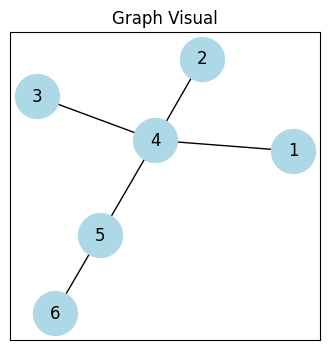

In [149]:
plot_simple_graph(
    graph_example, 
    node_color="lightblue",
    node_size=1000
)

**Definition**: Let $G=(V, E)$ be a simple graph. Let $v \in V$ be a vertex. Then, the **degree** of $v$ is defined as:
$$
\deg v := |\{ u \in V | uv \in E\} | = | \{ e \in E | v \in E \}|
$$
i.e., the degree of a vertex is the number of neighbors of $v$ or, equivalently, the number of edges $e$ that contain $v$. 

For example, in the above graph, the degree of the vertex "4" is 4, $\deg 4 = 4$, since there are four neighbors of 4, namely $(1, 2, 3, 5)$. Writing a Python function that compute the degree of a vertex in given graph is pretty simple: we simply need to check and count edges containing that vertex. 

In [150]:
def get_vertex_degree(G, v: Union[List[Union[str, int]], str, int]) -> dict:
    '''
    Function returning the degree of v in G

    Args:
        G (graph): a networkx graph
        v (List|str|int): a vertex/node in G or a list of vertex in G

    Returns:
        A dictionary with deg(v) 
    '''

    def __get_degree(v_i, e):
        '''
        Get the degree of vertex v_i, given edges e
        '''
        return len([True for x in e if v_i in x])
    
    if isinstance(v, (str, int)):  # If v is a string or an integer
        v = [v]  # Convert to a single-element list
    elif isinstance(v, list):  # If v is a list
        # Ensure all elements are either strings or integers
        if not all(isinstance(s, (str, int)) for s in v):
            raise ValueError("v must be either a list of strings/integers, or a single string/integer")
    else:
        raise ValueError("v must be either a list of strings/integers, or a single string/integer")

    # Check that each v in G:
    G_nodes = list(G.nodes)
    G_edges = list(G.edges)
    
    if all([True if x in v else False for x in G_nodes]):
        return { v_i: __get_degree(v_i, G_edges) for v_i in G_nodes }
    else:
        raise ValueError("All nodes MUST belong to the graph!")

In [151]:
get_vertex_degree(graph_example, list(graph_example.nodes))

{1: 1, 2: 1, 3: 1, 4: 4, 5: 2, 6: 1}

Of course, networkX already implements methods to compute the degree of a vertex, so in real applicatons we don't need to use the above function. In particular, given a networkx graph object we can call the method `.degree([])`, passing the interested node as input to compute its degree:

*Note*: notice that *edges*, *nodes*, *degree*, etc. of networkx graphs are set-like read-only views. 

In [152]:
graph_example.degree([4])

DegreeView({4: 4})

The library provides also a `.adj` class attributes listing node neighbors:

In [153]:
list(graph_example.adj[4])

[1, 2, 3, 5]

## The Euler and Mantel's Theorems

Let's state and prove some basic results in graph theory involving simple graphs. First of all we have the following:

**Preposition**: Let $G$ be a simple graph with $n$ vertices. Then, given $v \in V$, it holds $\deg v \leq (n-1)$.

This is a very simple result following by the definition of degree itself: the degree of $v$ is the number of neighbors of $v$; if $G$ has $n$ nodes then all neighbors of $v$ belong to the $(n-1)$-element subset of $V$ (i.e. $V / \{v\}$).
The following theorem is an importat result due to Euler (1736) which relates vertex degrees with the number of edges. 

**Theorem (Euler)**: Let $G$ be a simple graph. Then, the following formula holds:
$$
\sum_{v \in V} \deg v = 2 \cdot | E |
$$

In other words, the sum of degrees of all vertices of a simple graph $G$ equals twice the number of edges of $G$. Before proving this statement, let define some graphs and verify explicitly this formula.

In [154]:
# G1 
G1 = nx.Graph()
G1.add_nodes_from(["a", "b", "c", "d"])
G1.add_edges_from([("a", "b"), ("c", "d"), ("d", "b"), ("b", "a"), ("a", "c")])

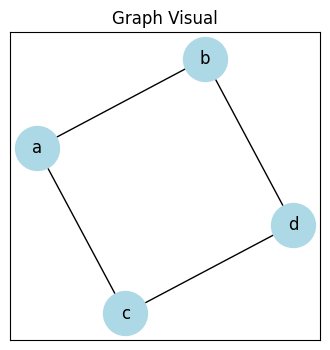

In [155]:
plot_simple_graph(
    G1, 
    node_color="lightblue",
    node_size=1000
)

In [156]:
# G2 
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4])
G2.add_edges_from([(1, 3), (3, 2), (3, 4), (2, 4)])

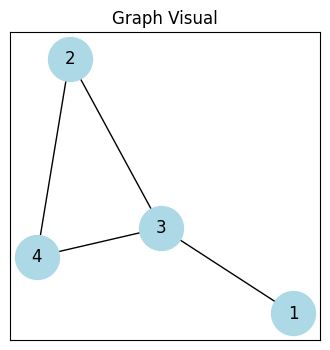

In [157]:
plot_simple_graph(
    G2, 
    node_color="lightblue",
    node_size=1000
)

In [158]:
# G3
G3 = nx.Graph()
G3.add_nodes_from([1, 2, 3, 4, 5])
G3.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (2, 5)])

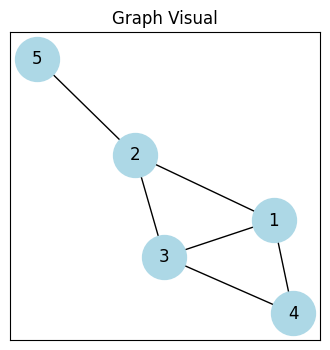

In [159]:
plot_simple_graph(
    G3, 
    node_color="lightblue",
    node_size=1000
)

In [160]:
# Cycling over graphs and printing the left and right side of the formula:
for graph in [G1, G2, G3]:
    print(f"Left: {sum(get_vertex_degree(graph, list(graph.nodes)).values())}   Right: {2*len(graph.edges)}")

Left: 8   Right: 8
Left: 8   Right: 8
Left: 12   Right: 12


Looking at those numbers it's clear that we are counting the number of pairs belonging to $V \times E$, so that each edge is counted twice. This number can be indeed computed in two different ways:
1. For each $v \in V$, we can count the number of edges containing $v$ - which is the degree of $v$ - and then sum these numbers, i.e, $\sum_v \deg v$;
2. On the other hand, since each edge contains 2 vertices, we can sum 2 over the number of edges in $G$, i.e. $\sum_e 2 = 2\cdot |E|$
Since the two results must be equal, it follows the formula stated above.

A corolloary to the Euler's formula is the so-called **handshake lemma**:

**Corollary (handshake)**: Let $G$ be a simple graph. Them , the number of vertices $v$ whose degree $\deg v$ is odd is even. 

*Proof.*: Since $\sum_v \deg v = 2 |E|$, the the sum of degrees $\deg v$ of $v \in V$ is even. Then, it must have an even number of odd addends. Therefore, it follows that the number of vertices with an odd $\deg v$ is even. 

This corollorary is often stated in the context of social networks as follows: *in a group of people (nodes), the number of persons with an odd number of friends in the group is even.* 

**Preposition**: Let $G$ be a graph with *at least* 2 vertices. Then, there exist two distinct vertices $v$ and $u$ with the same degree, i.e. $\deg v = \deg u$.

*Proof.*: We can prove the above result by contradiction. Let's suppose that all vertices of a graph $G$ have different degrees. Therefore, since the $\deg v \leq (n-1)$, we should have that the set of degrees of $V$ is $\{ 0, 1, ..., n-1 \}$ (in other words the map $v \to \deg v$ must be injective). So we have both a vertex with degree $0$ and a vertex with degree $n-1$. Can these vertex be adjacent? Yes, because $\deg v = n - 1$, so $u$ is adjacent to $v$. But, $\deg u = 0$, so it does not have adjacent nodes and this is a contraddiction. Therefore, there exist at least two vertices with the same degree. 

Another important result in graph theory is the **Mantel's Theorem**:

**Theorem (Mantel)**: Let $G$ be a simple graph with $n$ vertices and $e$ edges. Assume that $e > n^2/4$. Then, $G$ has a **triangle**, i.e. three distinct vertices that are pairwise adjacent. 

Before proving such theorem, let make an example:

In [161]:
# no-mantel
nomantel_g = nx.Graph()
nomantel_g.add_nodes_from([1, 2, 3, 4, 5,])
nomantel_g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

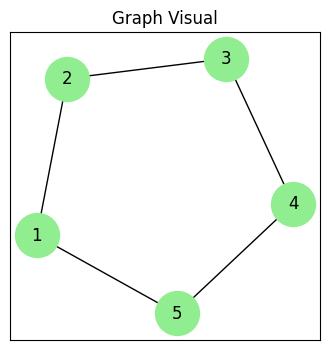

In [162]:
plot_simple_graph(
    nomantel_g,
    node_color="lightgreen",
    node_size=1000
)

By inspection we can see that the above graph has no triangle, therefore in contrast to Mantel's theorem, we should have $e \leq n^2 /4$. Indeed, $e=5$ and $n=5$, therefore $5 \leq 5^2 /4 \leq 6.25$. Notice that if we add an edge, regardless the edge we are adding, we are creating a triangle in the above pentagon-like graph. The relation $e \leq n^2/4$ still holds since Mantel's theorem does not guarantee that a graph with $e \leq n^2/4$ is triangle-free. It states that if $e > n^2/4$, then the graph must necessarily have at least one triangle. 

**Proof.**: We can prove the theorem by induction on $n$. Basically the theorem is stating that the maximum number of edges in a graph with $n$ vertices and no triangle is $n^2/4$. If $n=1,2$, the theorem is proved because $e$ is at most 1 and we cannot realize a triangle with 2 vertices. Let assume that $n > 2$ and $G$ be a triangle-free graph. Let define $uv$ an edge of $G$; by removing the $uv$ edge we find by definition another triangle-free graph with $n-2$ vertices, so by induction it has at most $(n-2)^2/4$ edges. The edge $uv$ has at most $n-2$ incident edges, otherwise there is a triangle, thus G can have at most:
$$
1 + (n-2) + (n-2)^2 / 4 = n^2 / 4
$$

## Graph Isomorphism

**Definition**: Let $G$ and $H$ two simple graphs. A **graph isomorphism** from $G$ to $H$ is a bijective map $\phi : V(G) \rightarrow V(H)$ that preserves edges, i.e. for any $u, v \in G$:
$$
(uv \in E(G) \Longleftrightarrow (\phi(u)\phi(v) \in E(H))
$$
We say that two graph are **isomorphic** if there is a graph isomorphism from $G$ to $H$. 

In the literature, some efficient algorithms to find whether two graphs are isomporhic are already documented. `networkx` already provides a method to check if two graphs are isomorphic, using the **VF2** algorithm, which is documented here: [An Improved Algorithm for Matching Large Graphs](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=f3e10bd7521ec6263a58fdaa4369dfe8ad50888c). However, it is useful, at least for *pedagogical purposes*, to implement a "brute-force" approach to find isomporhic maps between two graphs, if they exist. In the following, we consider some examples of simple, small graphs and apply such method (the approach is not computationally feasable for large graphs since it has a $O(n!\cdot m)$, where $n$ is the number of nodes and $m$ the number of edges). The idea is to:
1. Given two graphs $G_1 = (V_1, E_1)$ and $G_2= (V_2, E_2)$, find all possibile maps $V_1 \to V_2$. We will restrict to the simplest case of graphs with the same number of nodes.
2. Check each map and verify whether it presevers edges or not. We may stop as soon as we find a valid isomorphic map.

Let's start with the following simple example:

In [332]:
G1_iso1 = nx.Graph()
G1_iso1.add_nodes_from([1, 2, 3])
G1_iso1.add_edges_from([(1, 2), (2, 3)])

In [333]:
G2_iso1 = nx.Graph()
G2_iso1.add_nodes_from([1, 2, 3])
G2_iso1.add_edges_from([(1, 3), (2, 3)])

(None, None)

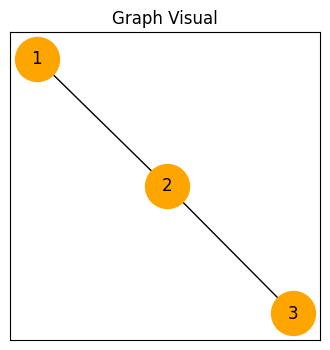

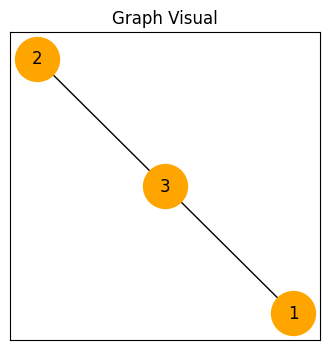

In [334]:
plot_simple_graph(
    G1_iso1, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso1, 
    node_color="orange",
    node_size=1000
)

The two graphs are isomorphic and a valid map may be:
$$
\begin{gather}
1 \to 1 \\
2 \to 3 \\
3 \to 2 \\
\end{gather}
$$
Indeed, 

In [335]:
nx.is_isomorphic(G1_iso1, G2_iso1)

True

Below, we have two functions: the first, `find_maps` accepts two networkx graphs and returns all possibile maps between their vertices (notice the use of `permutations` which introduce a factorial complexity). The second functions accepts again two networkx graphs, it calls the `find_maps` function and then it checks each map:

In [338]:
def find_maps(G1: nx.Graph(), G2: nx.Graph()) -> list[dict]:

    # Extracting nodes
    G1_nodes = list(G1.nodes)
    G2_nodes = list(G2.nodes)

    maps = []

    if len(G1_nodes) == len(G2_nodes):
        # Generate all possibile maps by combining elements from G1_nodes and all possibile permutations of G2_nodes
        for perm in list(itertools.permutations(G2_nodes)):
            maps.append(
                {G1_nodes[k]: perm[k] for k in range(len(G1_nodes))}
            )
    else:
        raise ValueError("Please provide two graphs with the same number of nodes")

    return maps

In [339]:
def find_graph_isomorphism(G1: nx.Graph(), G2: nx.Graph()) -> list[dict]:

    maps = find_maps(G1, G2)
    isomorphisms = []

    # Extracting edges
    G1_edges = list(G1.edges)
    G2_edges = list(G2.edges)

    # Cycling over maps
    for map in maps:
        # Boolean indicator 
        valid_map = True
        # Cycling over each edge and check whether the map preserve the edge
        for edge in G1_edges:
            # Hadling the case of undirectional graphs and mixed attributes
            mapped_edge = (map.get(edge[0]), map.get(edge[1]))
            mapped_edge_reverse = (map.get(edge[1]), map.get(edge[0]))

            # Valid if mapped edge is in the second graph
            if mapped_edge in G2_edges or mapped_edge_reverse in G2_edges:
                continue
            else:
                # If any edge fails, the map is invalid
                valid_map = False  
                # No need to check further edges for this map
                break  
            
            print(f"First Edge: {edge}, Mapped Edge {mapped_edge} found!")  # Debugging output
        
        if valid_map:  
            # Only append the map if all edges matched
            isomorphisms.append(map)

    return isomorphisms

In [346]:
find_graph_isomorphism(G1_iso1, G2_iso1)

[{1: 1, 2: 3, 3: 2}, {1: 2, 2: 3, 3: 1}]

The function has found two valid maps, i.e. isomorphisms mapping $V_1 to V_2$ and preserving edges. Therefore, the given graphs are isomorphic. Notice that there may exist more than one isomorphism between two graphs, since **isomorphism is concerned only with the topology of the graph** (how nodes are connected by edges), not the specific labels of the node. Consider the more complex case:

In [341]:
G1_iso2 = nx.Graph()
G1_iso2.add_nodes_from([1, 2, 3, 4, 5, 6])
G1_iso2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])

In [342]:
G2_iso2 = nx.Graph()
G2_iso2.add_nodes_from([1, 2, 3, "A", "B", "C"])
G2_iso2.add_edges_from([(1, "B"), (1, "C"), (2, "A"), (2, "C"), (3, "A"), (3, "B")])

(None, None)

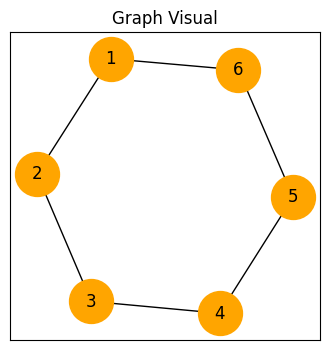

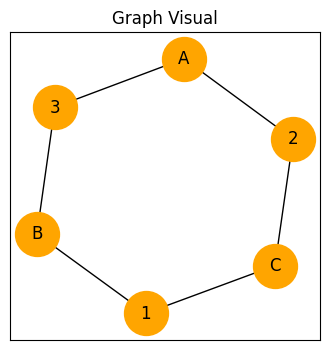

In [343]:
plot_simple_graph(
    G1_iso, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso, 
    node_color="orange",
    node_size=1000
)

In [344]:
nx.is_isomorphic(G1_iso2, G2_iso2)

True

In [348]:
find_graph_isomorphism(G1_iso2, G2_iso2)

[{1: 1, 2: 'B', 3: 3, 4: 'A', 5: 2, 6: 'C'},
 {1: 1, 2: 'C', 3: 2, 4: 'A', 5: 3, 6: 'B'},
 {1: 2, 2: 'A', 3: 3, 4: 'B', 5: 1, 6: 'C'},
 {1: 2, 2: 'C', 3: 1, 4: 'B', 5: 3, 6: 'A'},
 {1: 3, 2: 'A', 3: 2, 4: 'C', 5: 1, 6: 'B'},
 {1: 3, 2: 'B', 3: 1, 4: 'C', 5: 2, 6: 'A'},
 {1: 'A', 2: 2, 3: 'C', 4: 1, 5: 'B', 6: 3},
 {1: 'A', 2: 3, 3: 'B', 4: 1, 5: 'C', 6: 2},
 {1: 'B', 2: 1, 3: 'C', 4: 2, 5: 'A', 6: 3},
 {1: 'B', 2: 3, 3: 'A', 4: 2, 5: 'C', 6: 1},
 {1: 'C', 2: 1, 3: 'B', 4: 3, 5: 'A', 6: 2},
 {1: 'C', 2: 2, 3: 'A', 4: 3, 5: 'B', 6: 1}]

Again, the two graphs are isomorphic. In this case, there are a lot of possibile graph isomorphisms since we have a larger number of nodes. The number of isomorphisms between two graphs strictly depends on symmetrical and topological properties. The case depicted above is a rather particular case, since these are **cycle graphs** - which we will discuss shortly below. Cycle graphs are highly symmetrical and the number of isomorphisms is related to the so-called **automorphism group**. The automorphism groups is the set of all permutations of the graph's nodes that preserve its structure. For a $n$-cycle graph we have two types of symmetry:
1. **Rotational symmetry**: the graph is invariant under rotations. In case of $n$ nodes we have $n$ possibile rotations;
2. **Reflective symmetry**: the graph is invariant under reflections, i.e. flipping nodes w.r.t. an axis of reflection passing through two nodes. In case of $n$ nodes, there are $n$ reflections (the number of reflection axis is either $n$ or $n/2$ depending whether $n$ is odd or even respectively, and each axis produces two possibile reflections.
The total number of symmetries preserving the graph structure would be $n+n = 2n$. Each symmetry of the automorphism group is a valid isomorphism, therefore have $2n$ isomorphism between two $n$-cycle graph. Indeed, above we have found $ 6 \times 2 = 12$ isomorphisms between G1 and G2.

In [349]:
len(find_graph_isomorphism(G1_iso2, G2_iso2))

12

In [350]:
G1_iso3 = nx.Graph()
G1_iso3.add_nodes_from([1, 2, 3])
G1_iso3.add_edges_from([(1, 2), (2, 3), (3, 1)])

In [351]:
G2_iso3 = nx.Graph()
G2_iso3.add_nodes_from([1, 2, 3])
G2_iso3.add_edges_from([(2, 3), (3, 1)])

(None, None)

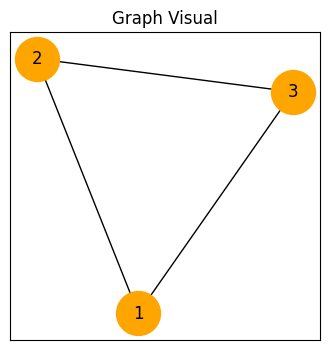

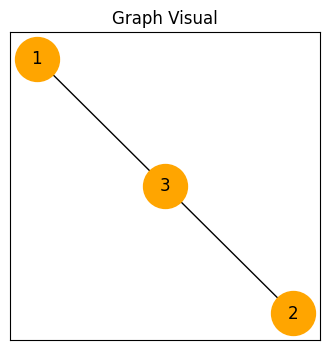

In [352]:
plot_simple_graph(
    G1_iso3, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso3, 
    node_color="orange",
    node_size=1000
)

Finally we have an example of two non-isomorphic graphs:

In [354]:
find_graph_isomorphism(G1_iso3, G2_iso3)

[]

In [355]:
nx.is_isomorphic(G1_iso3, G2_iso3)

False

**Preposition**: Let $G$ and $H$ be two simple graphs and $\phi$ a graph isomorphism $\phi : V(G) \rightarrow V(H)$. Then:
1. For $\forall v \in V(G)$, we have $\deg_G(v) = \deg_H(\phi(v))$
2. $|E(H)| = |E(G)|$
3. $|V(H)| = |V(G)|$

**Preposition (Re-labeling)**: Let $G$ be a simple graph. Let $S$ be a finite set such that $|S| = |V(G)|$. Then, there exists a simple graph $H$ that is isomorphic to $G$ and has $S$ as vertex set. 

### Cycle and Path graphs

When discussing above graph isomorphisms, we have briefly mentioned the existence of **cycle graphs**, that can be informally defined as graphs with a "circular shape".  Let give here a more formal definition:

**Definition**: For each $n > 1$, we define the $n$-th **cycle graph** $C_n$ to be a simple graph with
$$
(\{1, 2, ..., n \}, \{\{i, i+1\} | 1 \leq i < n \} \cup \{\{n, 1\}\}) 
$$
This graph has $n$ vertices and $n$ edges. An example is the $6$-cycle graph used in the previous section. Similarly, we can define:

**Definition**: For each $n \in \mathbb{N}$, the $n$-th **path graph** $P_n$ is a simple graph with
$$
(\{1, 2, ..., n \}, \{\{i, i+1\} | 1 \leq i < n \}) 
$$
This graph has $n$ vertices and $n-1$ edges (unlessn $n=0$, in which case it has 0 edges). Equivalently, a $n$-th path graph can be defined as a graph that becomes a cycle graph by adding the edge $n1$. 

`networkx` provide useful methods to check whether a graph contains a cycle or if a specific path can be identified in a given graph. For instance, let's consider the following graph:

In [368]:
C4 = nx.Graph()
C4.add_nodes_from([1, 2, 3, 4, 5, 6])
C4.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (5, 2), (6, 5)])

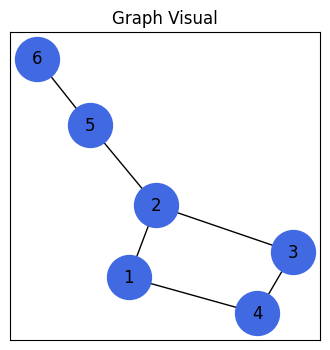

In [369]:
plot_simple_graph(
    C4, 
    node_color="royalblue",
    node_size=1000
)

In [370]:
nx.find_cycle(C4, orientation=None)

[(1, 2), (2, 3), (3, 4), (4, 1)]

The `nx.find_cycle` method identifies cycles within the graph. In the above example, we see that $(1, 2, 3, 4)$ forms a 4-th cycle. The `orientation` parameter allows specifying directions in case of directed graphs. For instance, if set to `reverse`,  every edge is traversed in the reverse direction. We have set it to `None`, since we are not dealing with directed graph and we don't need direction information. 
Similarly, we can use `is_path` to check whether a path exist inside the given graph:

In [371]:
# The path exist
nx.is_path(C4, [1, 2, 5])

True

In [372]:
# The path does not exist
nx.is_path(C4, [4, 2, 5])

False

Another interesting and more exotic graph is the so-called **Peterson graph**, named after Julius Peterson who discovered it in 1898. The graph is shown below:

In [358]:
G_peterson = nx.petersen_graph()

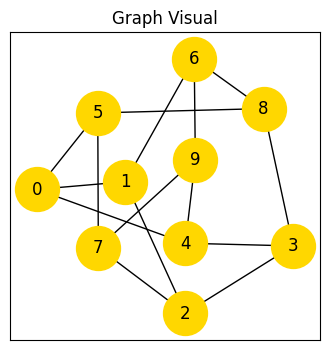

In [374]:
plot_simple_graph(
    G_peterson, 
    node_color="gold",
    node_size=1000
)

Usually, it is drawn as a pentagon with a pentagram inside. This graph has 10 vertices and 15 edges. It can be obtain by considering two disjoint 5-cycle graphs and connecting corresponding vertices with an edge. This graph is used in many areas of graph theory because of its interesting symmetrical and topological properties. For istance, it is an example of a **non-planar** graph, that is a graph which cannot be drawn in the plane without edge-crossing. 

## Subgraph

**Definition**: A **subgraph** of $G = (V, E)$ is a simple graph $H = (U, F)$ where $U \subseteq V$ and $F \subseteq E$. 

According to the above definition, given a subset $U$ of $V$ there is a natural subgraph **induced** on $G$, which can be denotes as: 
$$
(U, E \cap P_2(U)
$$
i.e. the subgraph whose vertices are the elements of $U$ and edges are those edges of $G$ whose both endpoints belong to the set $U$. According to the definitions given above, we can say that $P_n$, the $n$-th path graph, is a subgraph of the cycle graph $C_n$. Similarly, we can say that $P_{n-1}$ is a subgraph of $P_n$, namely that induced by the subset $(1, 2, ..., n-1)$ on $V = (1, 2, 3, ..., n)$. On the other hand, $C_{n-1}$ is not a subgraph of $C_n$ since $C_{n-1}$ has the edge $1(n-1)$ which is missing in $C_n$. Below, let's write a function that allows to obtain the subgraph induced by a given subset of vertices:

In [382]:
def get_subgraph(G: nx.Graph(), U: list) -> nx.Graph():
    V = list(G.nodes)
    if not all([True if u in V else False for u in V]):
        raise ValueError("All vertices in U must belong to the graph!")
    else:
        G_sub = G
        G_sub.remove_nodes_from([v for v in V if v not in U])
    return G_sub

In [383]:
# Create a "complete" graph
G5 = nx.complete_graph(5) 

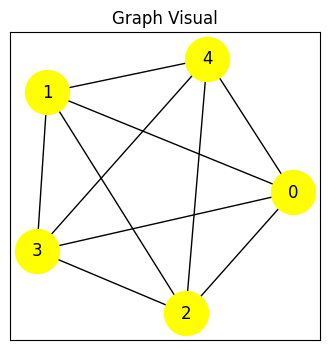

In [384]:
plot_simple_graph(
    G5, 
    node_color="yellow",
    node_size=1000
)

In [385]:
G5_sub = get_subgraph(G5, [1, 3, 4])

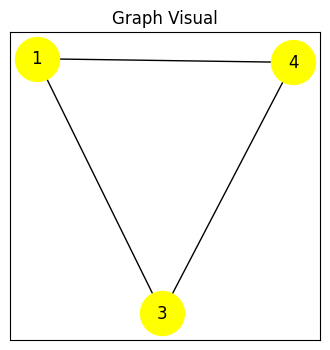

In [386]:
plot_simple_graph(
    G5_sub, 
    node_color="yellow",
    node_size=1000
)

Of course, there is an already implement method in `networkx`, `.subgraph()`, which can be called on the given graph:

In [387]:
G5_sub2 = G5.subgraph([1, 3, 4])

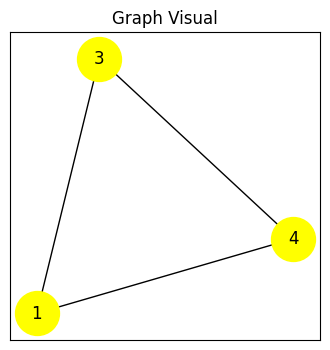

In [388]:
plot_simple_graph(
    G5_sub2, 
    node_color="yellow",
    node_size=1000
)